In [1]:
import sys

assert sys.version_info >= (3, 7)

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# PCA

In [59]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dhimanray/Machine_Learning_for_Chemistry/main/datasets/ala2_distance_data.csv',sep=',')

df.head(10)

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,...,d37,d38,d39,d40,d41,d42,d43,d44,d45,state
0,0.152,0.234,0.241,0.380,0.473,0.465,0.457,0.574,0.681,0.122,...,0.324,0.316,0.453,0.127,0.130,0.244,0.227,0.282,0.148,0
1,0.151,0.244,0.238,0.369,0.446,0.473,0.593,0.468,0.600,0.122,...,0.289,0.371,0.500,0.128,0.129,0.245,0.221,0.277,0.147,0
2,0.151,0.242,0.240,0.389,0.458,0.487,0.609,0.468,0.596,0.124,...,0.302,0.377,0.506,0.127,0.133,0.245,0.230,0.283,0.146,0
3,0.154,0.236,0.244,0.391,0.475,0.466,0.540,0.478,0.578,0.125,...,0.288,0.380,0.508,0.125,0.136,0.249,0.229,0.285,0.146,0
4,0.152,0.239,0.245,0.384,0.480,0.447,0.525,0.458,0.575,0.126,...,0.296,0.384,0.512,0.123,0.135,0.251,0.227,0.291,0.146,0
5,0.148,0.240,0.242,0.385,0.483,0.462,0.533,0.477,0.596,0.126,...,0.293,0.364,0.487,0.124,0.133,0.243,0.228,0.287,0.143,0
6,0.149,0.235,0.242,0.377,0.469,0.450,0.500,0.510,0.630,0.124,...,0.294,0.369,0.495,0.125,0.133,0.252,0.221,0.281,0.149,0
7,0.148,0.234,0.243,0.382,0.449,0.483,0.486,0.595,0.696,0.121,...,0.303,0.342,0.475,0.124,0.134,0.245,0.225,0.277,0.148,0
8,0.153,0.248,0.236,0.376,0.440,0.472,0.470,0.592,0.712,0.121,...,0.313,0.306,0.438,0.124,0.133,0.249,0.226,0.289,0.145,0
9,0.155,0.241,0.248,0.391,0.463,0.503,0.516,0.611,0.729,0.121,...,0.323,0.330,0.466,0.123,0.134,0.249,0.225,0.286,0.145,0


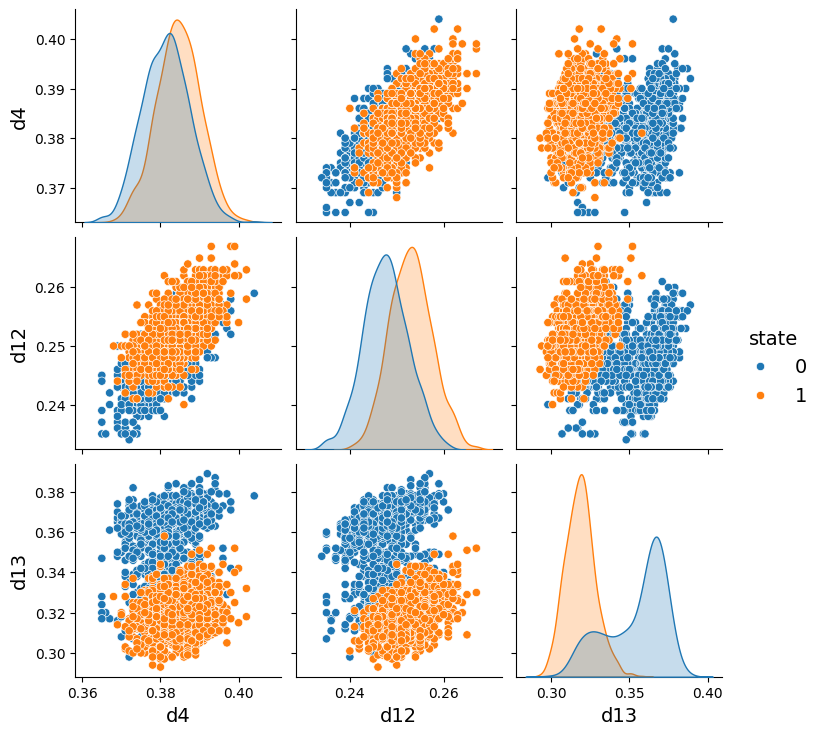

In [60]:
import seaborn as sns
sns.pairplot(df[['d4','d12','d13','state']],hue='state')

In [61]:
X = df.filter(regex='d').values #we are selecting those features which contain the letter 'd'
X.shape

(2002, 45)

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(X)

PCA(n_components=4)

In [63]:
print(pca.explained_variance_ratio_)

for i in range(len(pca.explained_variance_ratio_)):
    print('PC %d: %0.2f'%(i+1,pca.explained_variance_ratio_[i]*100))

[0.80843702 0.09025371 0.04465195 0.01815908]
PC 1: 80.84
PC 2: 9.03
PC 3: 4.47
PC 4: 1.82


In [64]:
X_pca = pca.fit_transform(X)

In [65]:
X_pca.shape

(2002, 4)

In [66]:
y = df.filter(regex='state').values

In [67]:
y.shape

(2002, 1)

In [68]:
projected_data = np.concatenate((X_pca,y),axis=1)

In [69]:
df_pca = pd.DataFrame(projected_data, columns=['PC 1','PC 2','PC 3','PC 4','state'])
df_pca.head()

,PC 1,PC 2,PC 3,PC 4,state
0,0.357013,0.007779,-0.001367,0.047784,0.0
1,-0.080983,0.047406,-0.039544,-0.044239,0.0
2,0.059942,0.046107,-0.160030,0.018750,0.0
3,-0.067890,0.099846,0.018945,-0.020272,0.0
4,-0.079113,0.096501,0.043542,-0.003759,0.0


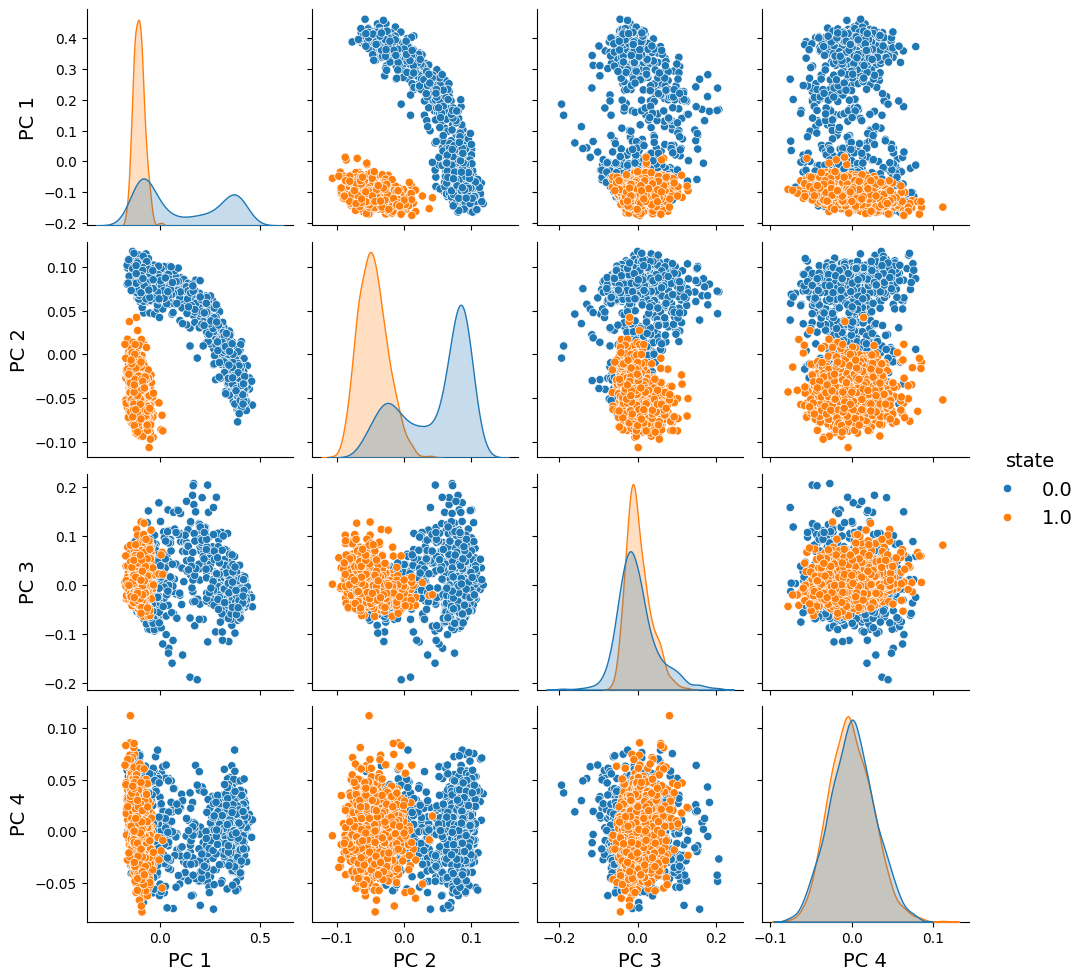

In [50]:
sns.pairplot(df_pca,hue='state')

# Some more code for plotting

In [77]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$PC 1$")
    plt.ylabel("$PC 2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)




# Classify the two states using SVM along PC1 and PC2

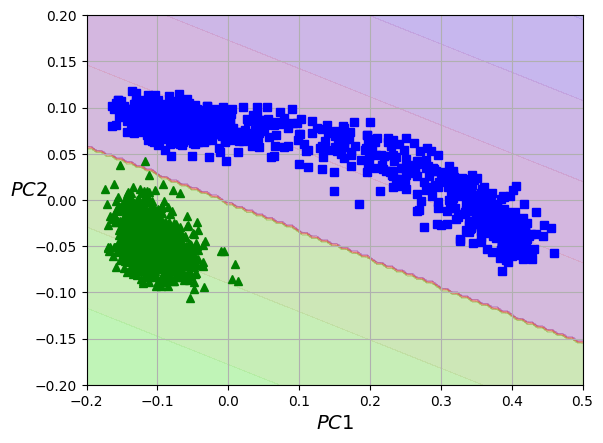

In [89]:
from sklearn.svm import SVC

X_data = df_pca[['PC 1','PC 2']]
y_data = df_pca[['state']]

svm_clf = SVC(C=1, max_iter=10_000,kernel='linear',random_state=42)
svm_clf.fit(X_data.values, y_data.values[:,0])

plot_predictions(svm_clf, [-0.2, 0.5, -0.2, 0.2])
plot_dataset(X_data.values, y_data.values[:,0], [-0.2, 0.5, -0.2, 0.2])

# Kernel PCA

In [99]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=4,kernel='rbf',gamma=100)
X_kpca = kpca.fit_transform(X)

kpca_projected_data = np.concatenate((X_kpca,y),axis=1)


df_kpca = pd.DataFrame(kpca_projected_data, columns=['kPC 1','kPC 2','kPC 3','kPC 4','state'])
df_kpca.head()


,kPC 1,kPC 2,kPC 3,kPC 4,state
0,-0.423134,0.527636,-0.113306,-0.021640,0.0
1,-0.221416,-0.343450,-0.081407,-0.232713,0.0
2,-0.216761,0.081018,0.084928,0.008980,0.0
3,-0.419651,-0.403206,0.142732,-0.003900,0.0
4,-0.403902,-0.383447,0.164205,0.078428,0.0


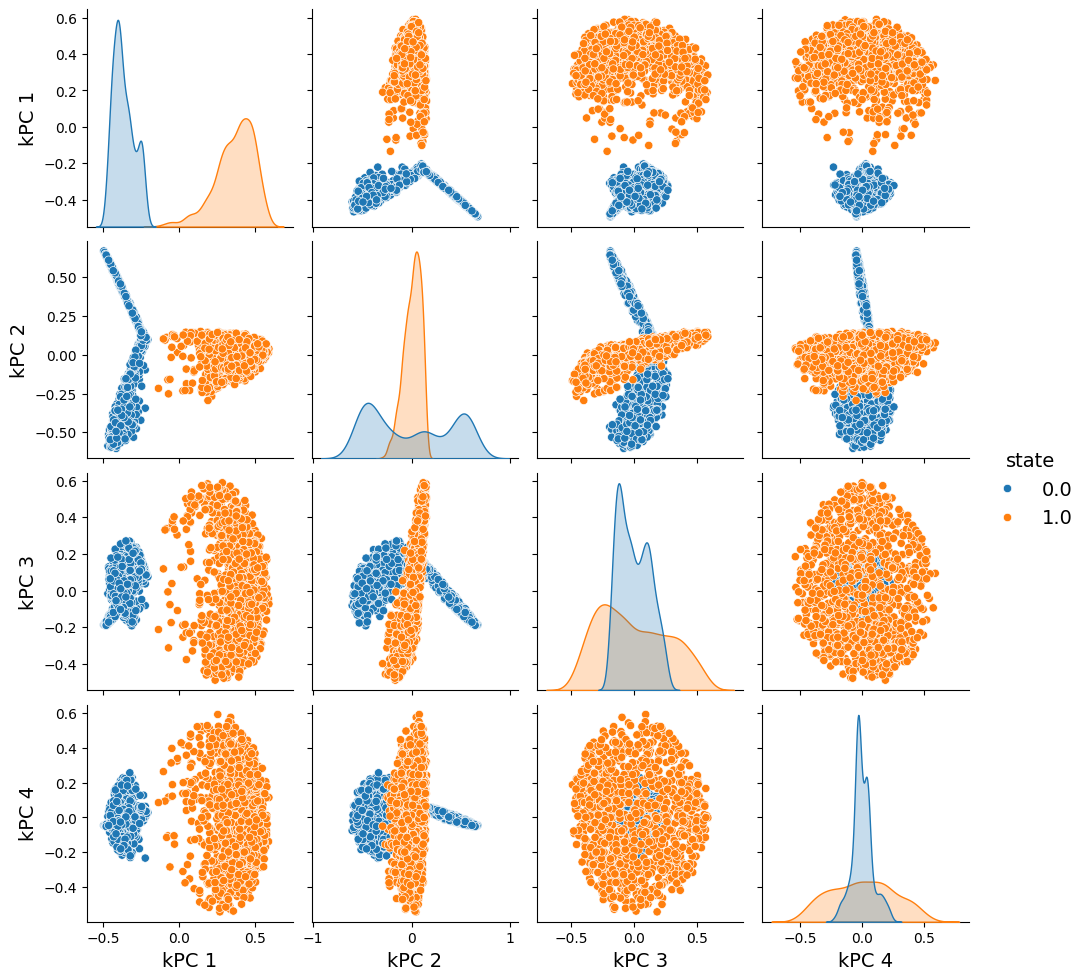

In [100]:
sns.pairplot(df_kpca,hue='state')

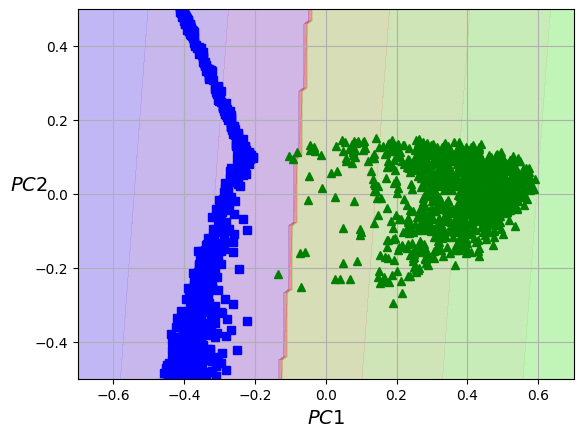

In [102]:
from sklearn.svm import SVC

X_data = df_kpca[['kPC 1','kPC 2']]
y_data = df_kpca[['state']]

svm_clf = SVC(C=1, max_iter=10_000,kernel='linear',random_state=42)
svm_clf.fit(X_data.values, y_data.values[:,0])

plot_predictions(svm_clf, [-0.7, 0.7, -0.5, 0.5])
plot_dataset(X_data.values, y_data.values[:,0], [-0.7, 0.7, -0.5, 0.5])

# TICA

In [28]:
!pip install deeptime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.0 MB/s eta 0:00:00


In [29]:
import numpy as np
from deeptime.decomposition import TICA

In [30]:
from deeptime.data import ellipsoids

# create dataset instance
ellipsoids = ellipsoids(seed=17)
# discrete transitions
discrete_trajectory = ellipsoids.discrete_trajectory(n_steps=1000)
# corresponding observations
feature_trajectory = ellipsoids.map_discrete_to_observations(discrete_trajectory)

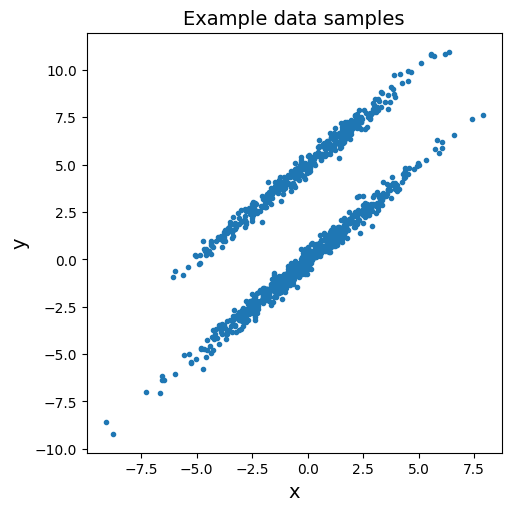

In [33]:
import matplotlib.pyplot as plt  # plotting
f, axes = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
ax1 = axes

# scatter plot of samples
ax1.scatter(*(feature_trajectory.T), marker='.')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Example data samples');



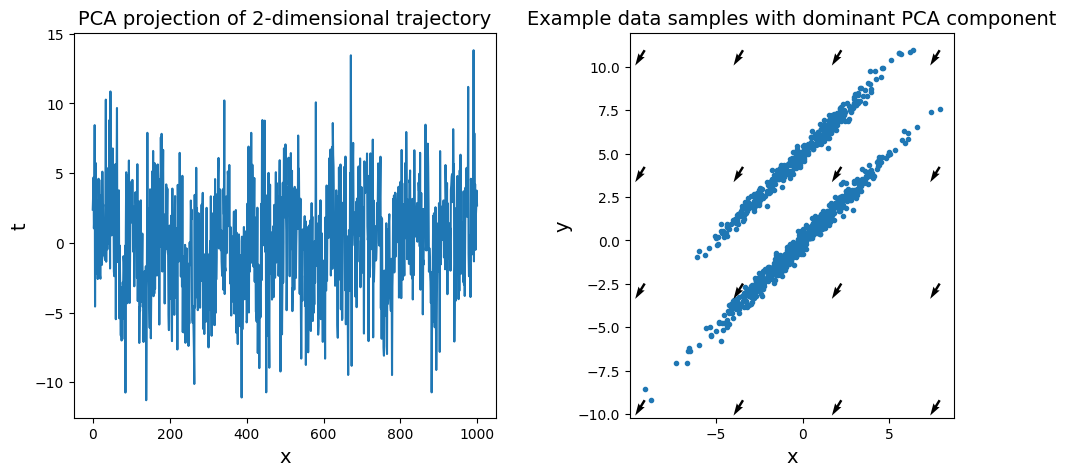

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1).fit(feature_trajectory)  # fit the 2-dimensional data

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
projection = pca.transform(feature_trajectory)
ax1.plot(projection)
ax1.set_title('PCA projection of 2-dimensional trajectory')
ax1.set_xlabel('x')
ax1.set_ylabel('t')

dxy = pca.components_[0]  # dominant pca component

ax2.scatter(*(feature_trajectory.T), marker='.')
x, y = np.meshgrid(
    np.linspace(np.min(feature_trajectory[:, 0]), np.max(feature_trajectory[:, 0]), 4),
    np.linspace(np.min(feature_trajectory[:, 1]), np.max(feature_trajectory[:, 1]), 4)
)
plt.quiver(x,y,dxy[0],dxy[1])

ax2.set_aspect('equal')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Example data samples with dominant PCA component');

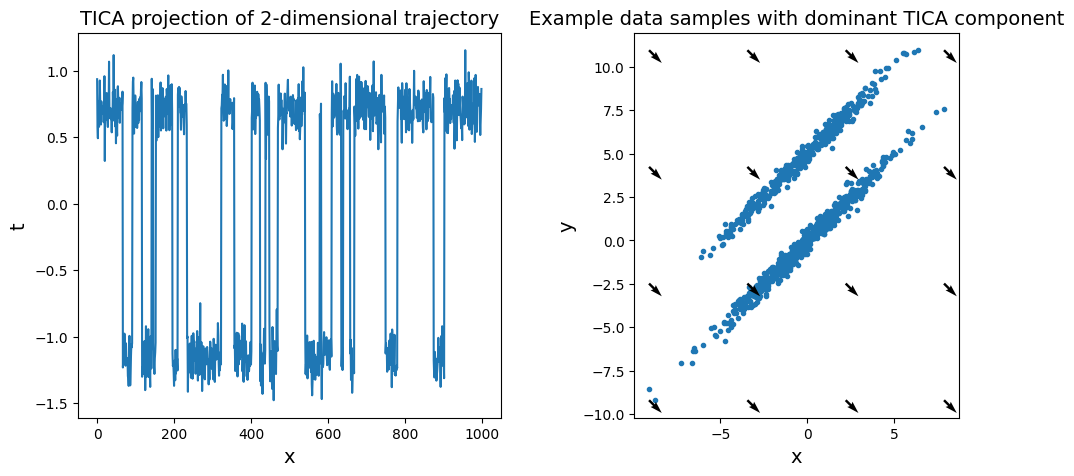

In [36]:
tica = TICA(dim=1,  # fix projection dimension explicitly
    lagtime=1
)

tica_model = tica.fit(feature_trajectory, lagtime=1).fetch_model()

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(tica_model.transform(feature_trajectory))
ax1.set_title('TICA projection of 2-dimensional trajectory')
ax1.set_xlabel('x')
ax1.set_ylabel('t')

dxy = tica_model.singular_vectors_left[:, 0]  # dominant tica component

ax2.scatter(*(feature_trajectory.T), marker='.')
x, y = np.meshgrid(
    np.linspace(np.min(feature_trajectory[:, 0]), np.max(feature_trajectory[:, 0]), 4),
    np.linspace(np.min(feature_trajectory[:, 1]), np.max(feature_trajectory[:, 1]), 4)
)
plt.quiver(x, y, dxy[0], dxy[1])

ax2.set_aspect('equal')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Example data samples with dominant TICA component');